In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-41.93203791306647 -14.958310318546495
-24.743799438827168 -79.99973494302554
54.23864500638669 -9.398241654494825
41.40141440513912 -75.30112135038154
-88.28679985101296 -76.6121143191568
25.432214509008546 -89.43253051001803
71.54325770074806 50.914440529671595
81.7348855204456 -106.70158189145216
-78.40752902213859 165.33543052115715
78.16698986561357 49.166804722068946
-84.65129316815198 54.911917098222574
-44.16610479390932 -143.46005053259566
11.530118288483422 -87.64539900314121
-38.41851004802554 179.008231798621
41.46295070946269 -144.67969252620622
30.28536157930928 -2.6002131620311957
-20.99008218711012 58.55765546768717
32.48640841487715 46.06025215305428
40.59664345522194 -13.181085109345474
84.0584463718846 98.68336135065499
83.90347827719543 97.74056292918749
-18.52179544746626 77.99367360262625
-68.93378662465467 11.301984886902176
5.335329185320219 -32.86784694597901
-46.592095610381094 -25.950154713713545
-74.82817266907023 -102.35100305069899
74.53466221105253 150.40

-30.437620008961453 100.96334453097455
-68.25957077689228 43.99179772446894
-58.22351821996056 -24.643076447702327
33.18940916973132 -152.38591893560263
47.4052194301475 45.59387736203786
-51.72093217925846 -171.32061275678993
-61.206594578529945 -36.38366900308412
3.1817708619965117 167.812038125742
-0.8798898351931683 7.6022327132050975
-25.792485458172052 172.3473232656312
-62.822425308940474 89.08209866250735
79.92073755646135 -171.37802110325677
-70.67538980125765 -5.277590949135259
2.7075828217711546 146.17800774488967
28.647579024511217 -118.79821601759531
21.256913693218024 -60.5036985934497
-0.03423661389672361 -127.81681683858463
32.673867490656306 -121.91019724365043
-64.84837008093605 111.3392951163309
-69.63373953704601 -85.50655887165553
17.37567956017034 97.95771286787328
76.37950439324987 -29.62549205466786
62.53616621262347 24.719294576776633
-70.36653720680549 51.44788148746392
-87.50413847848064 84.18905398757795
27.25669862933205 42.10285916620933
-60.32749812693599

3.3125063538192023 -136.63623525709312
-14.748834781463131 78.64957575572225
-22.453229867446524 138.93729093743121
-84.87421897298378 80.23626275613282
-62.19351020443922 148.41178189202873
51.306098422006755 -102.9570314101507
-66.68286134039998 -51.53025491213705
-17.932227057976746 -29.365213154531887
19.48221379999238 -84.23283484240567
-82.04027454139833 113.60285182116695
-9.175258160734572 103.87236364469646
-68.09779248158205 99.5791552082672
-31.82420388975359 28.37057317033657
83.70711912380881 43.351465561708864
-29.48524262829102 -135.0909974075444
-88.93483418843999 -131.61083377484715
-77.39850839618269 161.84722402062278
70.86841407809646 54.72776895496213
16.444727184905872 -80.60066322488086
41.02685415422374 42.60720399000823
84.40706248378191 -112.25793190062487
1.1934681695829426 125.80293302975662
-63.273305199590446 -26.956181626827146
58.44676164699294 -165.74313916820537
18.00617184370924 143.4271182836319
-6.568436443272304 50.87099977011155
4.614182480127184 

In [5]:
from citipy import citipy


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | taltal
Processing Record 3 of Set 1 | ballina
Processing Record 4 of Set 1 | carbondale
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | progreso
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | corinto
Processing Record 13 of Set 1 | tolaga bay
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | adrar
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | mehran
Processing Record 18 of Set 1 | peniche
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | jardim
Processing Rec

Processing Record 36 of Set 4 | mankono
Processing Record 37 of Set 4 | skovorodino
Processing Record 38 of Set 4 | kaeo
Processing Record 39 of Set 4 | jipijapa
Processing Record 40 of Set 4 | coahuayana
Processing Record 41 of Set 4 | provideniya
Processing Record 42 of Set 4 | barrow
Processing Record 43 of Set 4 | namibe
Processing Record 44 of Set 4 | bollnas
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | ketchikan
Processing Record 47 of Set 4 | sisimiut
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | meyungs
City not found. Skipping...
Processing Record 50 of Set 4 | aksha
Processing Record 1 of Set 5 | hasaki
Processing Record 2 of Set 5 | moate
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | lagoa
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 5 | malayal
Processing Record 7 of Set 5 | el badari
City not found. Skipping...
Processing Record 8 of Set 5 | kushima
Processing Record

Processing Record 23 of Set 8 | kahului
Processing Record 24 of Set 8 | san lorenzo
Processing Record 25 of Set 8 | marzuq
Processing Record 26 of Set 8 | huadian
Processing Record 27 of Set 8 | inhambane
Processing Record 28 of Set 8 | bossembele
City not found. Skipping...
Processing Record 29 of Set 8 | acajutla
Processing Record 30 of Set 8 | nome
Processing Record 31 of Set 8 | saint anthony
Processing Record 32 of Set 8 | pandan
Processing Record 33 of Set 8 | yerbogachen
Processing Record 34 of Set 8 | jinchang
Processing Record 35 of Set 8 | victoria
Processing Record 36 of Set 8 | sabha
Processing Record 37 of Set 8 | havre-saint-pierre
Processing Record 38 of Set 8 | kampot
Processing Record 39 of Set 8 | antofagasta
Processing Record 40 of Set 8 | ilam
Processing Record 41 of Set 8 | benxi
Processing Record 42 of Set 8 | troyes
Processing Record 43 of Set 8 | kailua
Processing Record 44 of Set 8 | burkhala
City not found. Skipping...
Processing Record 45 of Set 8 | salina
Pr

Processing Record 14 of Set 12 | corn island
Processing Record 15 of Set 12 | riohacha
Processing Record 16 of Set 12 | coihaique
Processing Record 17 of Set 12 | mackay
Processing Record 18 of Set 12 | ust-tsilma
Processing Record 19 of Set 12 | saldanha
Processing Record 20 of Set 12 | vangaindrano
Processing Record 21 of Set 12 | taoudenni
Processing Record 22 of Set 12 | vanimo
Processing Record 23 of Set 12 | bad doberan
Processing Record 24 of Set 12 | kijang
Processing Record 25 of Set 12 | aquiraz
Processing Record 26 of Set 12 | laguna
Processing Record 27 of Set 12 | grand forks
Processing Record 28 of Set 12 | terney
Processing Record 29 of Set 12 | paciran
Processing Record 30 of Set 12 | talca
Processing Record 31 of Set 12 | parati
Processing Record 32 of Set 12 | neiafu
Processing Record 33 of Set 12 | troitskoye
Processing Record 34 of Set 12 | bolshiye uki
City not found. Skipping...
Processing Record 35 of Set 12 | bonnyville
Processing Record 36 of Set 12 | rungata
C

In [13]:
len(city_data)

545

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,74.52,86,0,5.75,US,2022-07-20 06:01:32
1,Taltal,-25.4000,-70.4833,57.31,78,36,2.33,CL,2022-07-20 06:05:11
2,Ballina,-28.8667,153.5667,59.02,73,99,14.81,AU,2022-07-20 06:05:12
3,Carbondale,37.7273,-89.2168,79.02,92,0,4.61,US,2022-07-20 06:05:12
4,Ushuaia,-54.8000,-68.3000,33.08,98,99,3.56,AR,2022-07-20 06:03:02
5,Progreso,21.2833,-89.6667,82.51,84,35,8.16,MX,2022-07-20 06:05:13
6,Yellowknife,62.4560,-114.3525,59.11,87,98,14.23,CA,2022-07-20 06:01:26
7,Bluff,-46.6000,168.3333,43.81,72,98,10.71,NZ,2022-07-20 06:05:13
8,Port Alfred,-33.5906,26.8910,54.18,97,100,4.00,ZA,2022-07-20 06:05:14
9,Mataura,-46.1927,168.8643,43.48,84,97,2.39,NZ,2022-07-20 06:05:14


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [26]:
city_weather_data_df = city_data_df[new_column_order]
city_weather_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-07-20 06:01:32,42.0970,-79.2353,74.52,86,0,5.75
1,Taltal,CL,2022-07-20 06:05:11,-25.4000,-70.4833,57.31,78,36,2.33
2,Ballina,AU,2022-07-20 06:05:12,-28.8667,153.5667,59.02,73,99,14.81
3,Carbondale,US,2022-07-20 06:05:12,37.7273,-89.2168,79.02,92,0,4.61
4,Ushuaia,AR,2022-07-20 06:03:02,-54.8000,-68.3000,33.08,98,99,3.56
...,...,...,...,...,...,...,...,...,...
540,Lososina,RU,2022-07-20 06:21:07,48.9975,140.3106,66.96,76,75,5.10
541,Half Moon Bay,US,2022-07-20 06:21:08,37.4636,-122.4286,62.91,87,100,17.27
542,Gamba,GA,2022-07-20 06:16:40,-2.6500,10.0000,70.75,93,100,5.06
543,Maromitsa,RU,2022-07-20 06:21:09,59.8683,48.0123,53.44,97,100,9.53


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

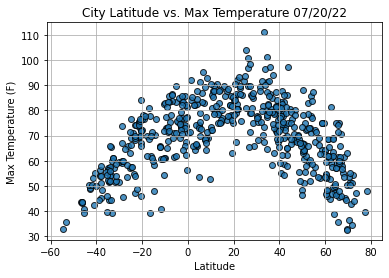

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

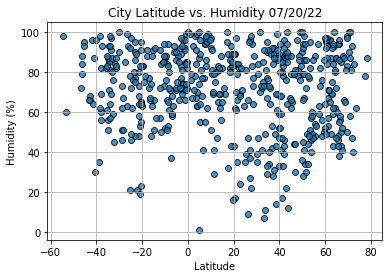

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

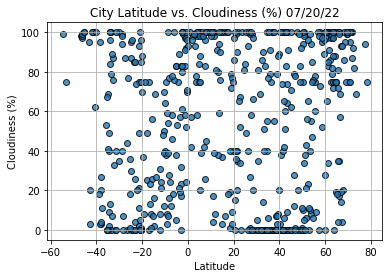

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

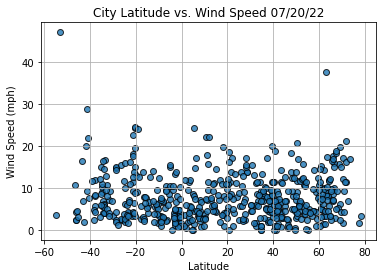

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
index13 = city_data_df.loc[13]
index13

City                        Adrar
Lat                       20.5022
Lng                      -10.0711
Max Temp                     85.6
Humidity                       17
Cloudiness                     15
Wind Speed                   5.39
Country                        MR
Date          2022-07-20 06:05:17
Name: 13, dtype: object

In [38]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
540     True
541     True
542    False
543     True
544     True
Name: Lat, Length: 545, dtype: bool

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,74.52,86,0,5.75,US,2022-07-20 06:01:32
3,Carbondale,37.7273,-89.2168,79.02,92,0,4.61,US,2022-07-20 06:05:12
5,Progreso,21.2833,-89.6667,82.51,84,35,8.16,MX,2022-07-20 06:05:13
6,Yellowknife,62.4560,-114.3525,59.11,87,98,14.23,CA,2022-07-20 06:01:26
10,Corinto,37.9407,22.9573,79.41,49,0,1.99,GR,2022-07-20 06:05:15
...,...,...,...,...,...,...,...,...,...
538,Mattawa,46.7379,-119.9028,78.01,30,0,9.22,US,2022-07-20 06:21:06
540,Lososina,48.9975,140.3106,66.96,76,75,5.10,RU,2022-07-20 06:21:07
541,Half Moon Bay,37.4636,-122.4286,62.91,87,100,17.27,US,2022-07-20 06:21:08
543,Maromitsa,59.8683,48.0123,53.44,97,100,9.53,RU,2022-07-20 06:21:09


In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,74.52,86,0,5.75,US,2022-07-20 06:01:32
3,Carbondale,37.7273,-89.2168,79.02,92,0,4.61,US,2022-07-20 06:05:12
5,Progreso,21.2833,-89.6667,82.51,84,35,8.16,MX,2022-07-20 06:05:13
6,Yellowknife,62.4560,-114.3525,59.11,87,98,14.23,CA,2022-07-20 06:01:26
10,Corinto,37.9407,22.9573,79.41,49,0,1.99,GR,2022-07-20 06:05:15


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

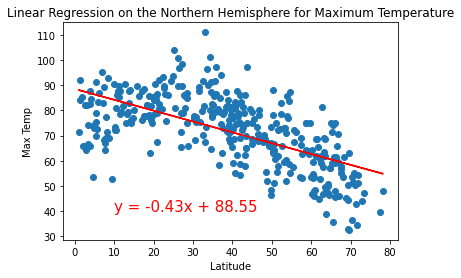

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
    'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

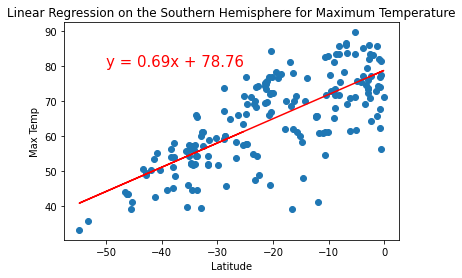

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

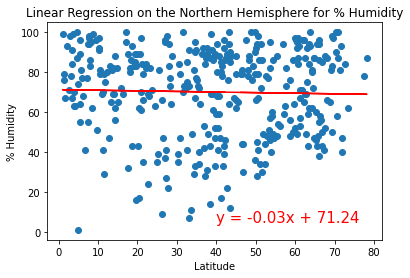

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,5))

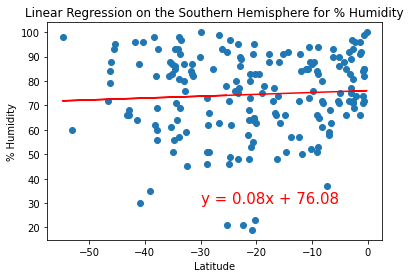

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-30,30))

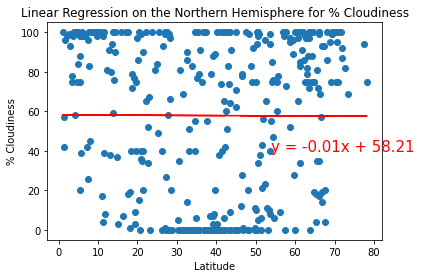

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(54,40))

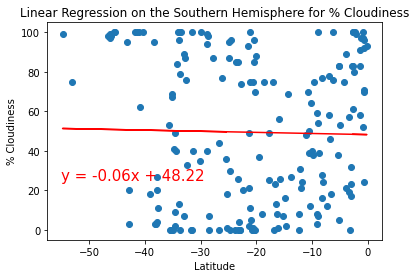

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,25))

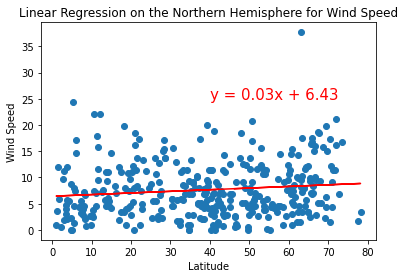

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,25))

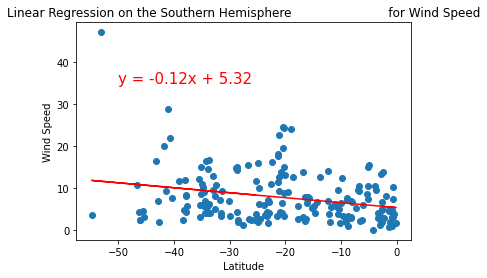

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))